In [1]:
import scipy.spatial.distance as dist
import pandas as pd
from sklearn.neighbors import DistanceMetric
import numpy as np
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [2]:
#a. Load the file
students = pd.read_csv('students.csv')

In [3]:
#b. Calculate the distance between student1 and student2 in the following ways:
def standardizedEuclidianDistance(data, val1, val2):
	zScores = stats.zscore(data)
	print('Standardized euclidian distance is', dist.euclidean(zScores[val1],zScores[val2]))

print('Euclidean distance is', dist.euclidean(students.iloc[0], students.iloc[1]))
standardizedEuclidianDistance(students, 0, 1)
print('Manhattan distance is', dist.cityblock(students.iloc[0], students.iloc[1]))

Euclidean distance is 8.366600265340756
Standardized euclidian distance is 1.5202124760972135
Manhattan distance is 20


In [4]:
#c. We are looking for four clusters in this set. Choose the following centroids:
#(9, 3, 14, 1, 6, 10, 10, 15)
#(12, 18, 9, 5, 18, 1, 3, 18)
#(6, 15, 13, 18, 9, 15, 20, 18)
#(5, 4, 7, 18, 20, 17, 1, 15)
#Now calculate the Euclidean distance of students 1, 10, 20 and 30 to these centroids.

centroids = pd.DataFrame({0:[9, 3, 14, 1, 6, 10, 10, 15],1:[12, 18, 9, 5, 18, 1, 3, 18],2:[6, 15, 13, 18, 9, 15, 20, 18],3:[5, 4, 7, 18, 20, 17, 1, 15]})
centroids = centroids.transpose()

for student_index in [1,10,20,30]:
    # index_centroid = 0
    for centroid in centroids.index:
        # print(centroid, 'centroid', index_centroid)
        # print(centroid,centroids.iloc[centroid])
        # print(centroid)
        distance = dist.euclidean(students.iloc[student_index-1], centroids.iloc[centroid])
        print('Euclidean distance of student {} to centroid {} is {}'.format(student_index, centroid, distance))
        # index_centroid +=1

kmeansmodel = KMeans(n_clusters=4)
kmeansmodel.fit(students)

students_kmeans = students.copy()
students_kmeans['cluster'] = kmeansmodel.labels_

# Look at the smallest values, these are the best clusters to put these students in.
# student 1 = first centroid
# student 2 = first centroid
# student 3 = third centroid
# student 4 = third centroid

#d. Which centroid would you assign these students to?

# def lookForClusters(data, amountOfClusters):
# 	kmeansmodel = KMeans(n_clusters=amountOfClusters)
# 	kmeansmodel.fit(data)
# 	# print the number of iterations required to converge
# 	print(kmeansmodel.n_iter_)
# 	# print the final locations of the centroid
# 	print(kmeansmodel.cluster_centers_)
# 	print(kmeansmodel.predict([[9, 3, 14, 1, 6, 10, 10, 15],[12, 18, 9, 5, 18, 1, 3, 18],[6, 15, 13, 18, 9, 15, 20, 18],[5, 4, 7, 18, 20, 17, 1, 15]]))

# lookForClusters(students, 4)

Euclidean distance of student 1 to centroid 0 is 8.12403840463596
Euclidean distance of student 1 to centroid 1 is 24.413111231467404
Euclidean distance of student 1 to centroid 2 is 19.339079605813716
Euclidean distance of student 1 to centroid 3 is 21.42428528562855
Euclidean distance of student 10 to centroid 0 is 13.92838827718412
Euclidean distance of student 10 to centroid 1 is 19.390719429665317
Euclidean distance of student 10 to centroid 2 is 17.146428199482248
Euclidean distance of student 10 to centroid 3 is 16.822603841260722
Euclidean distance of student 20 to centroid 0 is 19.570385790780925
Euclidean distance of student 20 to centroid 1 is 26.324893162176366
Euclidean distance of student 20 to centroid 2 is 12.609520212918492
Euclidean distance of student 20 to centroid 3 is 27.386127875258307
Euclidean distance of student 30 to centroid 0 is 24.331050121192877
Euclidean distance of student 30 to centroid 1 is 24.289915602982237
Euclidean distance of student 30 to centro

In [5]:
#e. Determine the categories (clusters) of each student using the K-means algorithm (4 clusters). How many students are in each category?
def kMeansAlgorithm(data, amountOfClusters):
	kmeansmodel = KMeans(n_clusters=amountOfClusters)
	kmeansmodel.fit(data)
	# print the labels
	print(kmeansmodel.labels_)
	# plot the points and the cluster
	fig, ax = plt.subplots(figsize=(5, 5))
	ax.set_xlabel('x')
	ax.set_ylabel('y')
	ax.grid(linestyle='--')
	ax.set_title('K-Means')
	# put unique labels in labels and retrieve the list of markers
	labels = set(kmeansmodel.labels_)
	markers = list(matplotlib.markers.MarkerStyle.markers.keys())
	# plot all points in a different color and marker
	for m, l in zip(markers, labels):
			indices = np.where(kmeansmodel.labels_ == l)[0] # is a tuple => [0]
			ax.scatter(data.loc[indices, 'subject1'], data.loc[indices, 'subject2'],marker=m, s=50)
	# plot the cluster center in the middle of the clusterplot
	ax.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1],marker= "o" , c='black', s=100)
	plt.show()

# kMeansAlgorithm(students, 4)

students_kmeans['cluster'].value_counts()

0    25
1    25
2    25
3    25
Name: cluster, dtype: int64

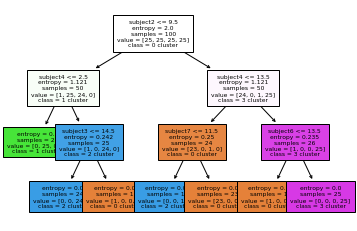

In [6]:
#f. Add a column containing the category. Use DecisionTreeClassifier in Python to create a decision tree.
classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(students_kmeans.drop(labels='cluster', axis=1), students_kmeans['cluster'])
tree.plot_tree(classifier, feature_names=students_kmeans.drop(labels='cluster',axis=1).columns.values, class_names=['{} cluster'.format(i) for i in np.unique(students_kmeans['cluster'])], filled=True, fontsize=6)
plt.show()

In [7]:
#g. How would you characterize these four categories?
# First cluster: students who can't manage subject2 norsubject1, 
# Third cluster:students who can manage subject 2 and subject4 reasonably well, but have no top score on subject3,
# The other two clusters are hard todescribe

In [9]:
#h. In which category does a new student fall with the following points : (10, 15, 12, 11, 13, 14, 9, 10)?
some_new_student = pd.DataFrame([10,15,12,11,13,14,9,10])
some_new_student = some_new_student.transpose()

print(kmeansmodel.predict(some_new_student))

[0]
